#### Importing all the libraries required

In [1]:
#Libraries for number and plotting
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
#Libraries for Images
import cv2
import tensorflow as tf
from PIL import Image
import os
os.chdir('D:/Traffic_Sign_Recognition')
#Libraries used for building model
from sklearn.model_selection import train_test_split #Used for spitting the data set
from keras.utils import to_categorical #Converts a class vector (integers) to binary class matrix.
from keras.models import Sequential, load_model #Used for models
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout #Used for different layers.

### Visualising Data

In [5]:
train_csv = pd.read_csv('Train.csv')
test_csv = pd.read_csv('Test.csv')
meta_csv = pd.read_csv('Meta.csv')

In [6]:
train_csv.head(10)

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png
5,31,27,6,5,26,22,20,Train/20/00020_00000_00005.png
6,31,28,6,6,26,23,20,Train/20/00020_00000_00006.png
7,31,28,6,6,26,23,20,Train/20/00020_00000_00007.png
8,31,29,5,6,26,24,20,Train/20/00020_00000_00008.png
9,34,32,6,6,29,26,20,Train/20/00020_00000_00009.png


In [7]:
test_csv.head(10)

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png
5,52,56,5,5,47,51,38,Test/00005.png
6,147,130,12,12,135,119,18,Test/00006.png
7,32,33,5,5,26,28,12,Test/00007.png
8,45,50,6,5,40,45,25,Test/00008.png
9,81,86,7,7,74,79,35,Test/00009.png


In [8]:
meta_csv.head(10)

,Path,ClassId,ShapeId,ColorId,SignId
0,Meta/27.png,27,0,0,1.32
1,Meta/0.png,0,1,0,3.29
2,Meta/1.png,1,1,0,3.29
3,Meta/10.png,10,1,0,3.27
4,Meta/11.png,11,0,0,1.22
5,Meta/12.png,12,2,2,2.3
6,Meta/13.png,13,4,0,2.1
7,Meta/14.png,14,3,0,2.2
8,Meta/15.png,15,1,0,3.1
9,Meta/16.png,16,1,0,3.3


In [9]:
data = []
labels = []
# We have 43 Classes
classes = 43
cur_path = os.getcwd()

In [10]:
cur_path

'D:\\Traffic_Sign_Recognition'

### Preprocessing of Images

In [11]:
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except Exception as e:
            print(e)

In [12]:
data = np.array(data)
labels = np.array(labels)

In [13]:
os.mkdir('training')

np.save('./training/data',data)
np.save('./training/target',labels)

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'training'

#### Loading the Numerical Data of Images

In [14]:
data=np.load('./training/data.npy')
labels=np.load('./training/target.npy')

In [15]:
print(data.shape, labels.shape)

(78418, 30, 30, 3) (78418,)


In [16]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=0)

In [17]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(62734, 30, 30, 3) (15684, 30, 30, 3) (62734,) (15684,)


In [18]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

### Building model

In [19]:
model = Sequential()
# First CNN Layer with filter size 5*5 with relu activation function
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))

# Second CNN Layer with filter size 5*5 with relu activation function
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))

# Max pooling used for reducing resolution 
model.add(MaxPool2D(pool_size=(2, 2)))

# Drop out layer used for reducing the overfitting 
model.add(Dropout(rate=0.25))

# Third  CNN Layer with filter size 5*5 with relu activation function
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))

# Fourth CNN Layer with filter size 5*5 with relu activation function
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))

# Max pooling used for reducing resolution 
model.add(MaxPool2D(pool_size=(2, 2)))

# Drop out layer used for reducing the overfitting 
model.add(Dropout(rate=0.25))

#Converting the data in 1 D array 
model.add(Flatten())
model.add(Dense(256, activation='relu'))

# Drop out layer used for reducing the overfitting 
model.add(Dropout(rate=0.5))

# We have 43 classes that's why we have defined 43 in the dense
model.add(Dense(43, activation='softmax'))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        2432      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 32)        25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 11, 11, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 64)          18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 64)          36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 64)          0

In [21]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [22]:
import datetime
import time

start = datetime.datetime.now()
epochs = 15
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))
end= datetime.datetime.now()
elapsed= end-start
print ("Time:" , elapsed)

Epoch 1/15
1961/1961 [==============================] - 210s 107ms/step - loss: 1.4910 - accuracy: 0.5822 - val_loss: 0.5174 - val_accuracy: 0.8562
Epoch 2/15
1961/1961 [==============================] - 192s 98ms/step - loss: 0.4897 - accuracy: 0.8534 - val_loss: 0.1140 - val_accuracy: 0.9685
Epoch 3/15
1961/1961 [==============================] - 188s 96ms/step - loss: 0.3321 - accuracy: 0.9026 - val_loss: 0.0812 - val_accuracy: 0.9768
Epoch 4/15
1961/1961 [==============================] - 167s 85ms/step - loss: 0.2710 - accuracy: 0.9213 - val_loss: 0.0684 - val_accuracy: 0.9802
Epoch 5/15
1961/1961 [==============================] - 157s 80ms/step - loss: 0.2616 - accuracy: 0.9269 - val_loss: 0.0611 - val_accuracy: 0.9809
Epoch 6/15
1961/1961 [==============================] - 182s 93ms/step - loss: 0.2659 - accuracy: 0.9286 - val_loss: 0.0803 - val_accuracy: 0.9767
Epoch 7/15
1961/1961 [==============================] - 179s 91ms/step - loss: 0.2428 - accuracy: 0.9349 - val_loss: 

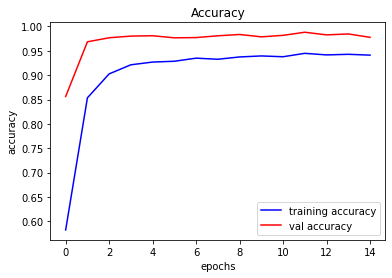

In [23]:
# Accuracy
plt.plot(history.history['accuracy'], label='training accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='val accuracy', color='red')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

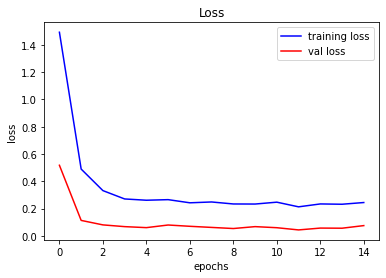

In [24]:
# Loss
plt.plot(history.history['loss'], label='training loss' , color='blue')
plt.plot(history.history['val_loss'], label='val loss', color='red' )
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

## Testing Model

### Preprocesing Images for Testing

In [25]:
#for testing the function for preprocessing of the images
def testing(testcsv):
    y_test = pd.read_csv(testcsv)
    label = y_test["ClassId"].values
    imgs = y_test["Path"].values
    data=[]
    for img in imgs:
        image = Image.open(img)
        image = image.resize((30,30))
        data.append(np.array(image))
    X_test=np.array(data)
    return X_test,label

In [26]:
X_test, label = testing('Test.csv')

Printing Images for Testing

In [27]:
Y_pred = model.predict_classes(X_test)
Y_pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([16,  1, 38, ...,  3,  7, 10], dtype=int64)

Plot Graph on Prediction and Labels

### Accuracy of Model

In [28]:
from sklearn.metrics import accuracy_score
print(accuracy_score(label, Y_pred))

0.9327790973871734


Classification Metrics

In [29]:
from sklearn.metrics import confusion_matrix

#### Saving Model

In [30]:
model.save("./training/TSR.h5")

#### Loading Model

In [31]:
import os
os.chdir(r'D:\Traffic_Sign_Recognition')
from keras.models import load_model
model = load_model('./training/TSR.h5')

### Printing the Predicted Class
Classes

In [32]:
# Classes of trafic signs
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

#### Processing of New Images

In [33]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
def test_on_img(img):
    data=[]
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
    X_test=np.array(data)
    Y_pred = model.predict_classes(X_test)
    return image,Y_pred

#### Printing Results of Prediction

Predicted traffic sign is:  Speed limit (80km/h)


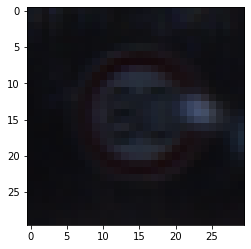

In [34]:
plot,prediction = test_on_img(r'D:\Traffic_Sign_Recognition\Test\00395.png')
s = [str(i) for i in prediction] 
a = int("".join(s))
print("Predicted traffic sign is: ", classes[a])
plt.imshow(plot)
plt.show()

Predicted traffic sign is:  Speed limit (30km/h)


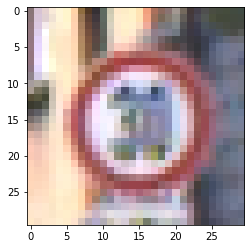

In [35]:
plot,prediction = test_on_img(r'D:\Traffic_Sign_Recognition\Test\00100.png')
s = [str(i) for i in prediction] 
a = int("".join(s))
print("Predicted traffic sign is: ", classes[a])
plt.imshow(plot)
plt.show()

Predicted traffic sign is:  Keep right


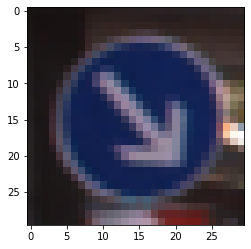

In [36]:
plot,prediction = test_on_img(r'D:\Traffic_Sign_Recognition\Test\00005.png')
s = [str(i) for i in prediction] 
a = int("".join(s))
print("Predicted traffic sign is: ", classes[a])
plt.imshow(plot)
plt.show()